In [1]:
#import necessary libraries

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

import os

In [2]:
#get current path to enter to the file

path = os.getcwd()
path = path + r'\Introduction to GIS Analysis with GeoPandas using Python\Shapefiles'
print(path)

D:\STUDIA\Programowanie\DATA_SCIENCE\GEOPANDAS\Geopandas_Intro\Introduction to GIS Analysis with GeoPandas using Python\Shapefiles


In [3]:
#read cities shapefile

cities_path = path + r'\belgian_cities.shp'

cities = gpd.read_file(cities_path)


#rename column
cities.rename(columns={'NAME_4':'NAME'},inplace=True)

cities

,NAME,geometry
0,Anderlecht,"POLYGON ((143793.126 166452.379, 143610.878 16..."
1,Brussel,"POLYGON ((147766.293 170637.180, 147826.869 17..."
2,Elsene,"MULTIPOLYGON (((151867.674 167090.660, 151805...."
3,Etterbeek,"POLYGON ((152732.322 169655.021, 152703.407 16..."
4,Evere,"POLYGON ((153968.453 172252.061, 153885.348 17..."
...,...,...
584,Doische,"POLYGON ((166456.205 88160.166, 166362.371 885..."
585,Florennes,"POLYGON ((179950.274 98553.366, 179560.529 985..."
586,Philippeville,"POLYGON ((166456.205 88160.166, 166297.781 879..."
587,Viroinval,"POLYGON ((173013.224 77770.619, 172844.129 770..."


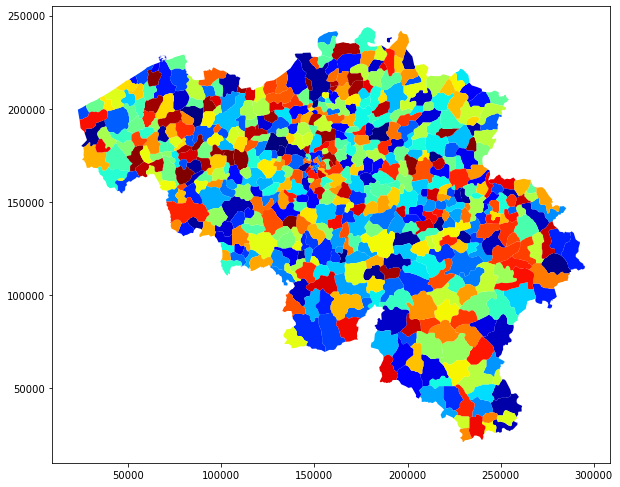

In [4]:
#plot cities by geopandas
cities.plot(cmap='jet', column = 'NAME', figsize = (10,10))

In [5]:
#import area of interest shapefile

AOI_path = path + r'\area_of_interest_.shp'

AOI = gpd.read_file(AOI_path)

In [6]:
AOI

,Id,geometry
0,0,"POLYGON ((155695.193 208475.625, 155876.391 20..."


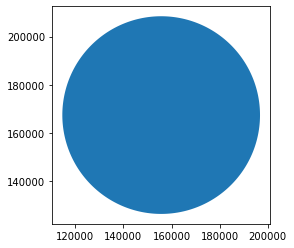

In [7]:
AOI.plot()

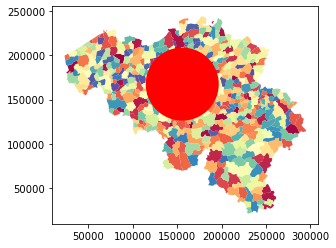

In [8]:
#display both shp together

#matplotlib colors are available here: https://matplotlib.org/users/colormaps.html


fig, ax = plt.subplots(1)
cities.plot(ax=ax, cmap='Spectral', column = 'NAME')
AOI.plot(ax=ax,color='red')

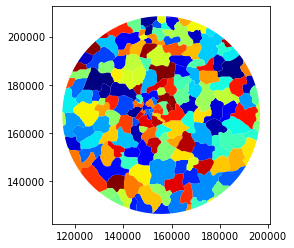

In [12]:
#intersection

cities_intersection_AOI = gpd.overlay(cities, AOI, how = 'intersection')
cities_intersection_AOI.plot(cmap = 'jet',column = 'NAME')

In [13]:
#check coordinate system of file
cities.crs 

<Projected CRS: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B ...>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [17]:
#calculate the area of shapefile
area = cities_intersection_AOI.area

In [20]:
#Create new column for area
cities_intersection_AOI['AREA(sq_m)'] = area

In [21]:
cities_intersection_AOI

,NAME,Id,geometry,AREA,AREA(sq_m)
0,Anderlecht,0,"POLYGON ((143793.126 166452.379, 143610.878 16...",1.783468e+07,1.783468e+07
1,Brussel,0,"POLYGON ((147766.293 170637.180, 147826.869 17...",3.221806e+07,3.221806e+07
2,Elsene,0,"MULTIPOLYGON (((151867.674 167090.660, 151805....",6.039562e+06,6.039562e+06
3,Etterbeek,0,"POLYGON ((152732.322 169655.021, 152703.407 16...",2.962803e+06,2.962803e+06
4,Evere,0,"POLYGON ((153968.453 172252.061, 153885.348 17...",5.037014e+06,5.037014e+06
...,...,...,...,...,...
181,Jemeppe-sur-Sambre,0,"POLYGON ((168377.727 128291.878, 168387.327 12...",1.751827e+07,1.751827e+07
182,La Bruyère,0,"POLYGON ((178038.074 132890.380, 177986.856 13...",2.408626e+07,2.408626e+07
183,Namur,0,"POLYGON ((174844.759 131020.333, 174838.102 13...",2.395717e+06,2.395717e+06
184,Sambreville,0,"POLYGON ((165946.567 127585.068, 166304.590 12...",4.317153e+06,4.317153e+06


In [22]:
#save geodataframe to shp
cities_intersection_AOI.to_file(path+'/My_Created_ShapeFile.shp')